# IWBDA SBOL data workshop

This workshop was created and presented by Gonzalo Vidal.

If you have any doubt or would like more information about related content, please contact me at gonzalo.vidalpena@colorado.edu

# Setup

## Install SBOL utilities package

In [ ]:
!pip install git+https://github.com/Gonza10V/SBOL-utilities --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 746.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.0/824.0 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

## Create a folder with the genebank files

Copy the needed genebank files from https://github.com/Gonza10V/SBOL-utilities/tree/gonzalo-internship3/test/test_files into a Google Drive folder. You have to mount that folder for the code to have access to these files.

## Mount drive to access gb files

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


change directory to the one where the genebank file are located, in my case is the folder: *SBOL_GoldenGate*


In [ ]:
cd drive/MyDrive/SBOL_GoldenGate/

/content/drive/MyDrive/SBOL_GoldenGate


## Import all the necesary packages and functions

In [ ]:
import os
import sbol3
from sbol_utilities import component
from sbol_utilities.component import ed_restriction_enzyme, backbone, part_in_backbone,  part_in_backbone_from_sbol, \
    digestion, ligation, Assembly_plan_composite_in_backbone_single_enzyme, backbone_from_sbol
from sbol_utilities.conversion import convert_from_genbank, convert3to2

# Simple assembly

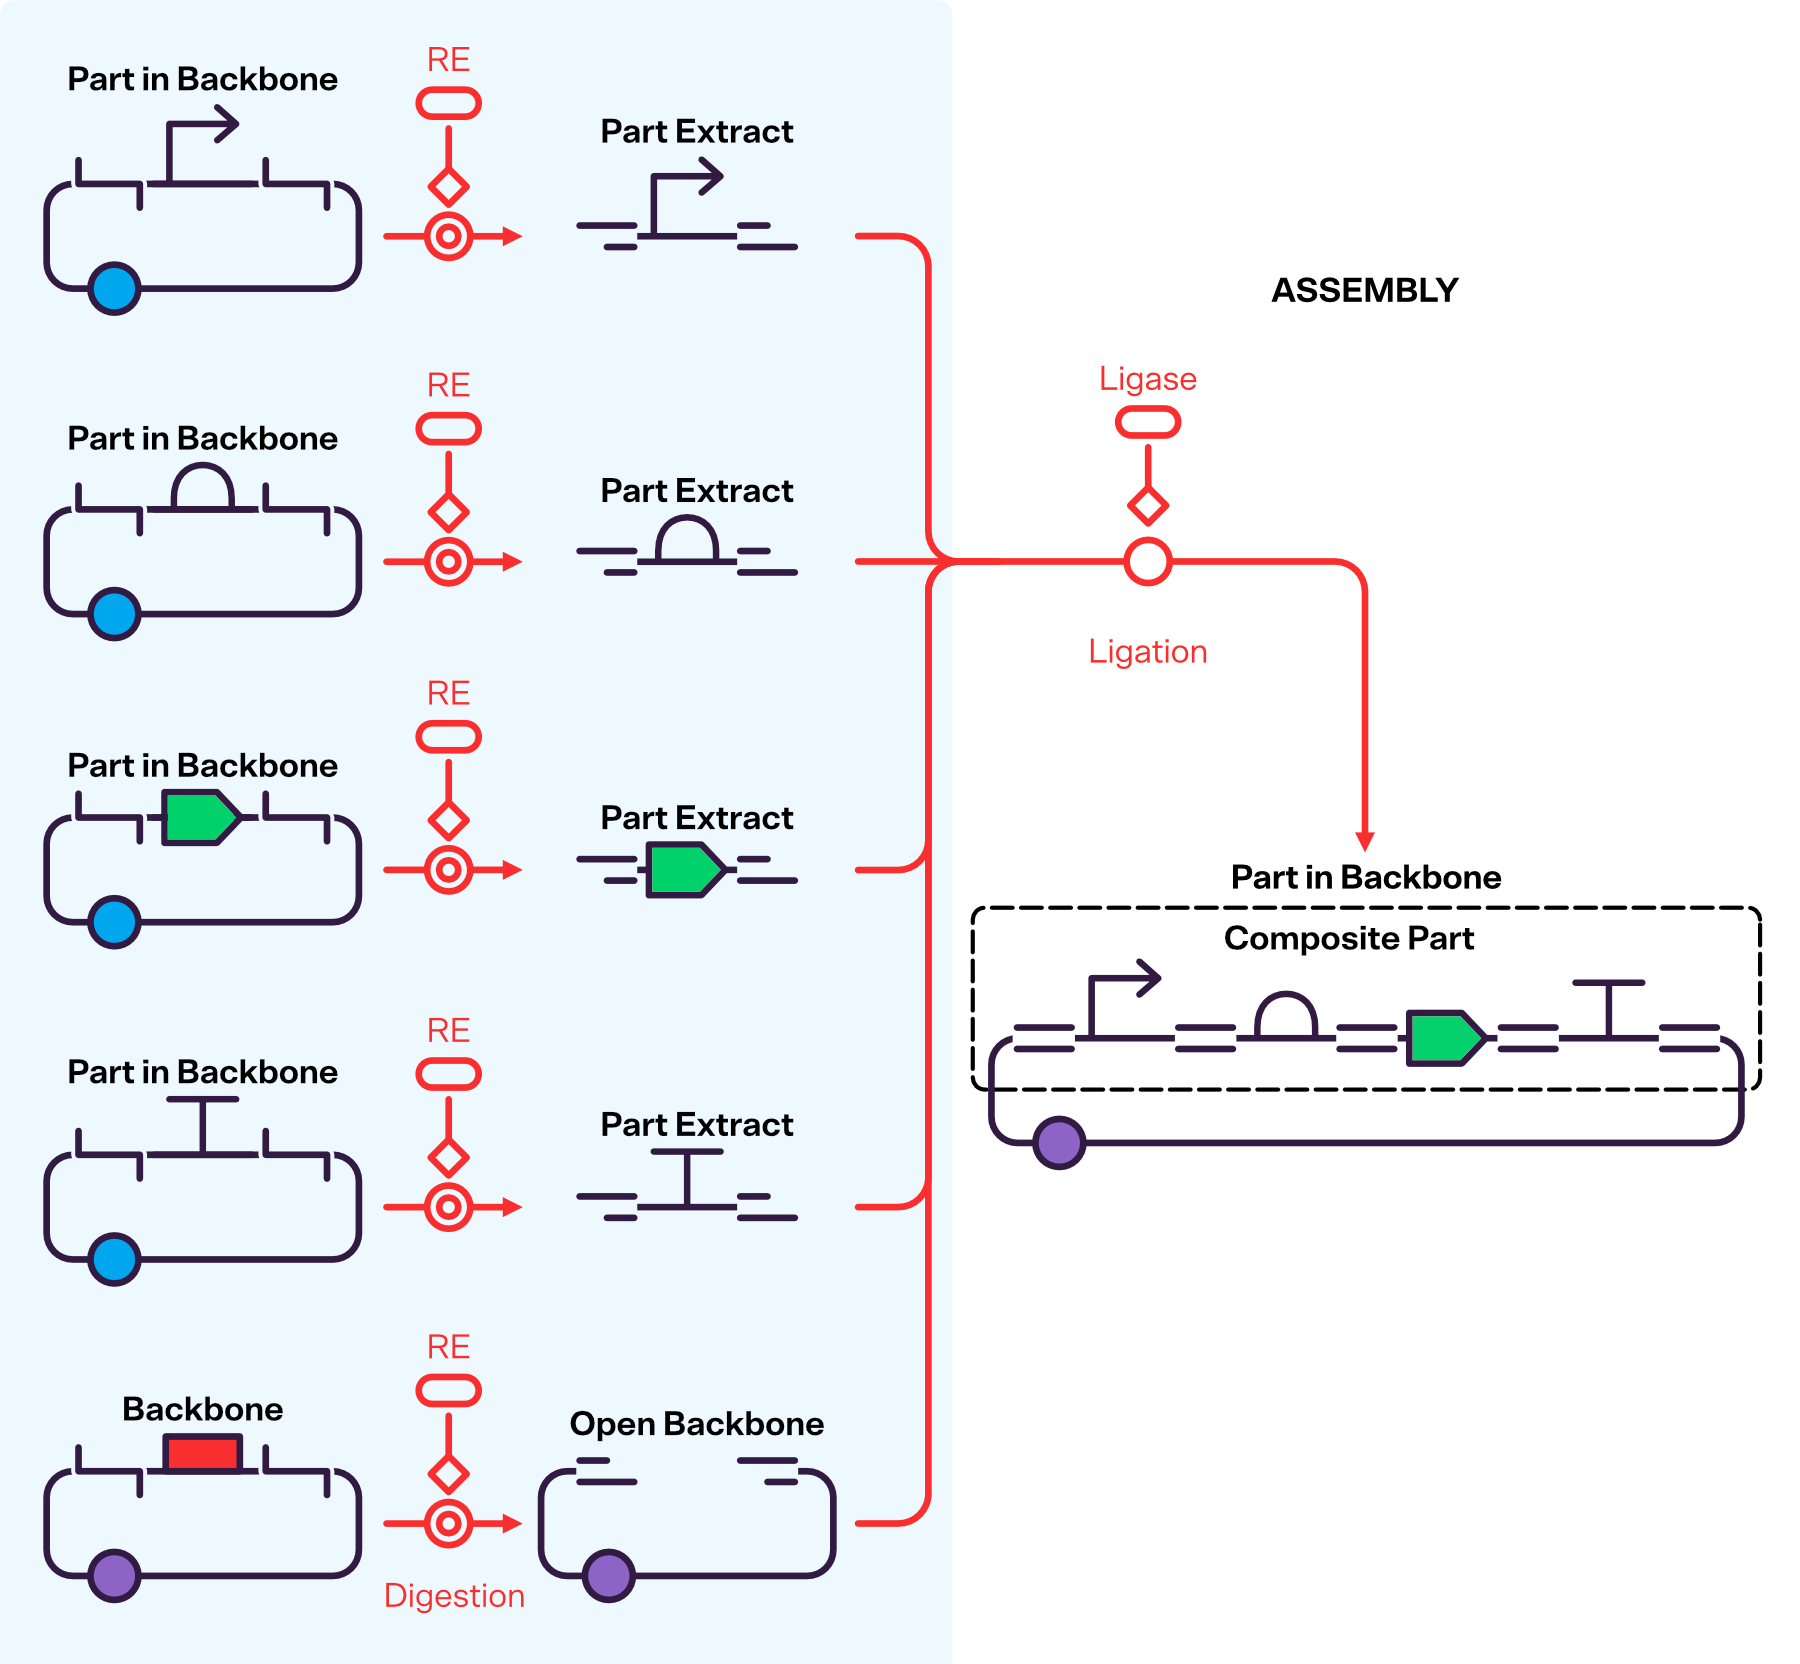

In [ ]:
"""Test assembly plan class"""
doc = sbol3.Document()
sbol3.set_namespace('http://sbolstandard.org/testfiles')
# Assembly plan setup

## restriction enzyme
bsai = ed_restriction_enzyme('BsaI')

## lvl1 acceptor, pOdd from Loop assembly. Hint: here you can write the direction of your .gb file for your own assemblies.
podd1_dir = os.path.join('podd1.gb')
podd_doc = convert_from_genbank(podd1_dir, 'https://github.com/Gonza10V')
podd_af = [top_level for top_level in podd_doc if type(top_level)==sbol3.Component][0]
podd_backbone, podd_backbone_seq = backbone_from_sbol('pOdd_bb', podd_af, [680,1770], 4, False, name='pOdd_bb')
doc.add([podd_backbone,podd_backbone_seq])

## parts in backbone
### get parts from genbank. Hint: here you can write the direction of your .gb files for your own assemblies.
j23100_dir = os.path.join('ab_j23100.gb')
b0034_dir = os.path.join('bc_b0034.gb')
gfp_dir = os.path.join('ce_gfp.gb')
b0015_dir = os.path.join('ef_b0015.gb')
### convert them into SBOL. Hint: if you modify the directories just be consistent here, you can add any URL namespace.
j23100_doc = convert_from_genbank(j23100_dir, 'https://github.com/Gonza10V')
j23100_ab = [top_level for top_level in j23100_doc if type(top_level)==sbol3.Component][0]
b0034_doc = convert_from_genbank(b0034_dir, 'https://github.com/Gonza10V')
b0034_bc = [top_level for top_level in b0034_doc if type(top_level)==sbol3.Component][0]
gfp_doc = convert_from_genbank(gfp_dir, 'https://github.com/Gonza10V')
gfp_ce = [top_level for top_level in gfp_doc if type(top_level)==sbol3.Component][0]
b0015_doc = convert_from_genbank(b0015_dir, 'https://github.com/Gonza10V')
b0015_ef = [top_level for top_level in b0015_doc if type(top_level)==sbol3.Component][0]
### SBOL parts in backbone. Hint: Again, if you mofify the file be consistent in the file to call, for example j23100, and the position of the part, for example [479,513].
# J23100
j23100_ab_in_bb, j23100_ab_in_bb_seq = part_in_backbone_from_sbol('j23100_ab_in_bb', j23100_ab, [479,513], [sbol3.SO_PROMOTER], 4, False, name='j23100_ab_in_bb')
doc.add([j23100_ab_in_bb, j23100_ab_in_bb_seq])
# B0034
b0034_bc_in_bb, b0034_bc_in_bb_seq = part_in_backbone_from_sbol('b0034_bc_in_bb', b0034_bc, [479,499], [sbol3.SO_RBS], 4, False, name='b0034_bc_in_bb')
doc.add([b0034_bc_in_bb, b0034_bc_in_bb_seq])
# GFP
gfp_ce_in_bb, gfp_ce_in_bb_seq = part_in_backbone_from_sbol('gfp_ce_in_bb', gfp_ce, [479,1195], [sbol3.SO_CDS], 4, False, name='gfp_ce_in_bb')
doc.add([gfp_ce_in_bb, gfp_ce_in_bb_seq])
# B0015
b0015_ef_in_bb, b0015_ef_in_bb_seq = part_in_backbone_from_sbol('b0015_ef_in_bb', b0015_ef, [518,646], [sbol3.SO_TERMINATOR], 4, False, name='b0015_ef_in_bb')
doc.add([b0015_ef_in_bb, b0015_ef_in_bb_seq])

# Assembly plan
simple_assembly_plan = Assembly_plan_composite_in_backbone_single_enzyme(
                    name='simple_green_transcriptional_unit',
                    parts_in_backbone=[j23100_ab_in_bb, b0034_bc_in_bb, gfp_ce_in_bb, b0015_ef_in_bb],
                    acceptor_backbone=podd_backbone,
                    restriction_enzyme=bsai,
                    document=doc)
simple_assembly_plan.run()

Should have 1 product

In [ ]:
print(len(simple_assembly_plan.products))
simple_assembly_plan.products

1


[[<sbol3.component.Component at 0x797c43d57760>,

Print doc components

In [ ]:
for obj in simple_assembly_plan.document.objects:
    print(obj.identity)

http://sbolstandard.org/testfiles/pOdd_bb
http://sbolstandard.org/testfiles/pOdd_bb_seq
http://sbolstandard.org/testfiles/j23100_ab_in_bb
http://sbolstandard.org/testfiles/j23100_ab_in_bb_seq
http://sbolstandard.org/testfiles/b0034_bc_in_bb
http://sbolstandard.org/testfiles/b0034_bc_in_bb_seq
http://sbolstandard.org/testfiles/gfp_ce_in_bb
http://sbolstandard.org/testfiles/gfp_ce_in_bb_seq
http://sbolstandard.org/testfiles/b0015_ef_in_bb
http://sbolstandard.org/testfiles/b0015_ef_in_bb_seq
http://sbolstandard.org/testfiles/simple_green_transcriptional_unit_assembly_plan
http://sbolstandard.org/testfiles/j23100_ab_in_bb_part_extract
http://sbolstandard.org/testfiles/j23100_ab_in_bb_part_extract_seq
http://sbolstandard.org/testfiles/b0034_bc_in_bb_part_extract
http://sbolstandard.org/testfiles/b0034_bc_in_bb_part_extract_seq
http://sbolstandard.org/testfiles/gfp_ce_in_bb_part_extract
http://sbolstandard.org/testfiles/gfp_ce_in_bb_part_extract_seq
http://sbolstandard.org/testfiles/b0015_ef

get component sequence

In [ ]:
for obj in simple_assembly_plan.document.objects:
    if obj.identity =='http://sbolstandard.org/testfiles/composite_1_part_5_part_1_j23100_ab_in_bb_part_2_b0034_bc_in_bb_part_3_gfp_ce_in_bb_part_4_b0015_ef_in_bb':
        print(obj.sequences[0].lookup().elements)

cgctgcatgaagagcctgcagtccggcaaaaaagggcaaggtgtcaccaccctgccctttttctttaaaaccgaaaagattacttcgcgttatgcaggcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccacaggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatc

In [ ]:
simple_assembly_plan.document.write('IWBDA24_simple_tu.xml')

# Combinatorial assembly

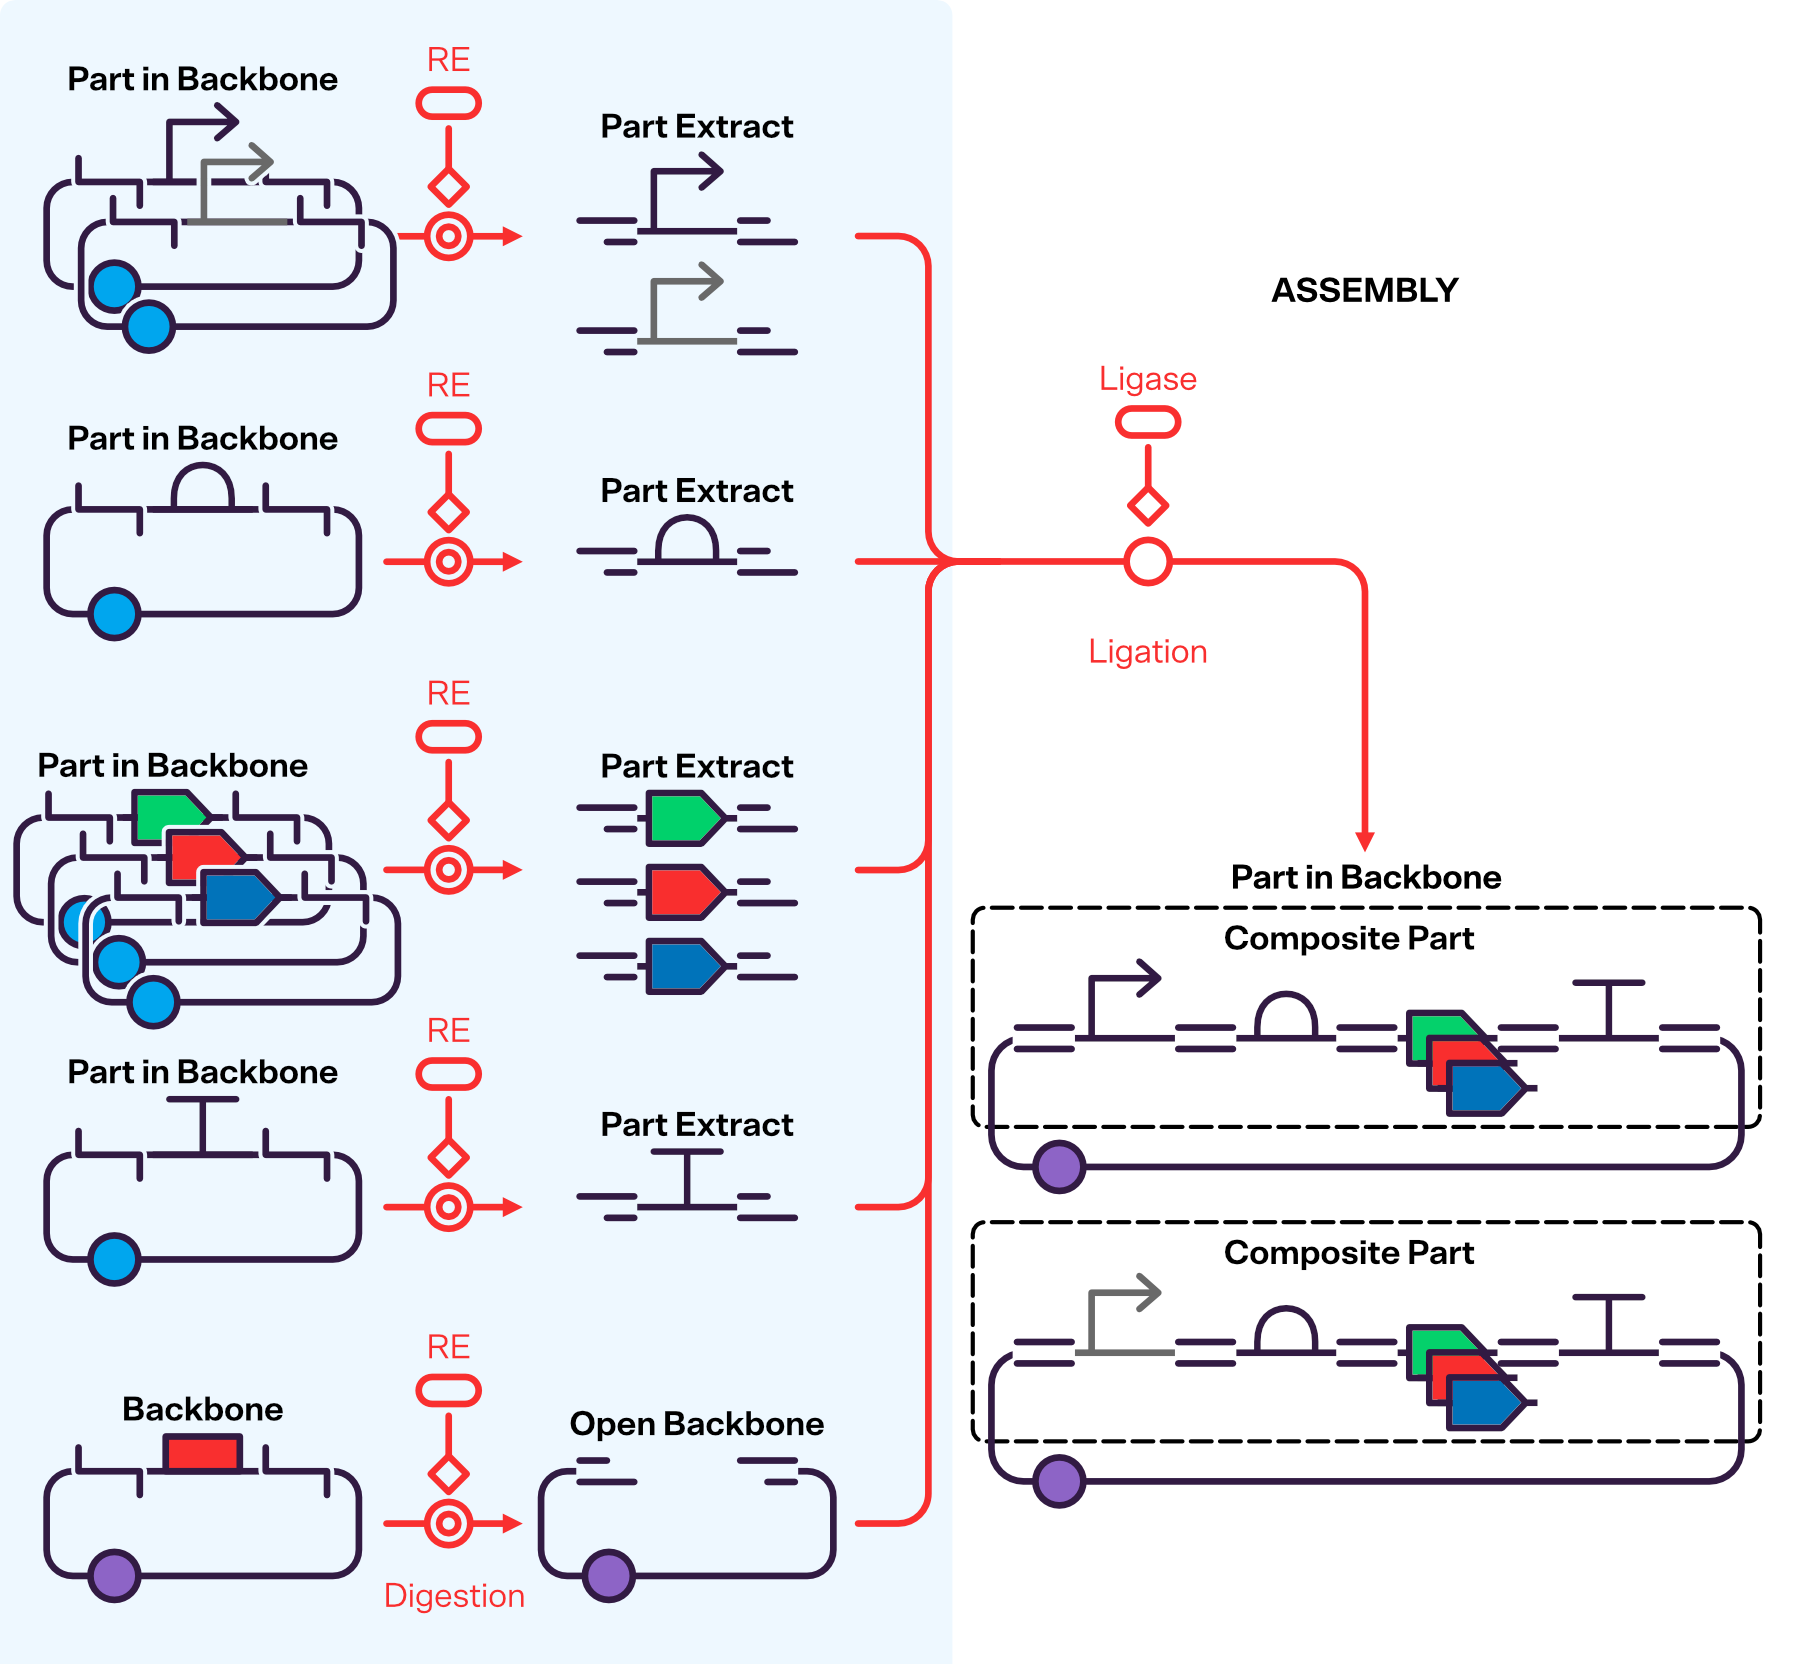

In [ ]:
"""Test assembly plan class"""
doc = sbol3.Document()
sbol3.set_namespace('http://sbolstandard.org/testfiles')
# Assembly plan setup
bsai = ed_restriction_enzyme('BsaI')
## lvl1 acceptor. Hint: here you can write the direction of your .gb files for your own assemblies.
podd1_dir = os.path.join('podd1.gb')
podd_doc = convert_from_genbank(podd1_dir, 'https://github.com/Gonza10V')
podd_af = [top_level for top_level in podd_doc if type(top_level)==sbol3.Component][0]
podd_backbone, podd_backbone_seq = backbone_from_sbol('pOdd_bb', podd_af, [680,1770], 4, False, name='pOdd_bb')
doc.add([podd_backbone,podd_backbone_seq])
## parts in backbone
### get parts from genbank. Hint: here you can write the direction of your .gb files for your own assemblies.
j23100_dir = os.path.join('ab_j23100.gb')
j23101_dir = os.path.join('ab_j23101.gb')
b0034_dir = os.path.join('bc_b0034.gb')
gfp_dir = os.path.join('ce_gfp.gb')
rfp_dir = os.path.join('ce_mrfp1.gb')
cfp_dir = os.path.join('ce_ecfp.gb')
b0015_dir = os.path.join('ef_b0015.gb')
### convert genebank files into SBOL. Hint: if you modify the directories just be consistent here, you can add any URL namespace.
j23100_doc = convert_from_genbank(j23100_dir, 'https://github.com/Gonza10V')
j23100_ab = [top_level for top_level in j23100_doc if type(top_level)==sbol3.Component][0]
j23101_doc = convert_from_genbank(j23101_dir, 'https://github.com/Gonza10V')
j23101_ab = [top_level for top_level in j23101_doc if type(top_level)==sbol3.Component][0]
b0034_doc = convert_from_genbank(b0034_dir, 'https://github.com/Gonza10V')
b0034_bc = [top_level for top_level in b0034_doc if type(top_level)==sbol3.Component][0]
gfp_doc = convert_from_genbank(gfp_dir, 'https://github.com/Gonza10V')
gfp_ce = [top_level for top_level in gfp_doc if type(top_level)==sbol3.Component][0]
rfp_doc = convert_from_genbank(rfp_dir, 'https://github.com/Gonza10V')
rfp_ce = [top_level for top_level in rfp_doc if type(top_level)==sbol3.Component][0]
cfp_doc = convert_from_genbank(cfp_dir, 'https://github.com/Gonza10V')
cfp_ce = [top_level for top_level in cfp_doc if type(top_level)==sbol3.Component][0]
b0015_doc = convert_from_genbank(b0015_dir, 'https://github.com/Gonza10V')
b0015_ef = [top_level for top_level in b0015_doc if type(top_level)==sbol3.Component][0]
### SBOL parts in backbone. Hint: Again, if you mofify the file be consistent in the file to call, for example j23100, and the position of the part, for example [479,513].
# J23100
j23100_ab_in_bb, j23100_ab_in_bb_seq = part_in_backbone_from_sbol('j23100_ab_in_bb', j23100_ab, [479,513], [sbol3.SO_PROMOTER], 4, False, name='j23100_ab_in_bb')
doc.add([j23100_ab_in_bb, j23100_ab_in_bb_seq])
# J23101
j23101_ab_in_bb, j23101_ab_in_bb_seq = part_in_backbone_from_sbol('j23101_ab_in_bb', j23101_ab, [479,513], [sbol3.SO_PROMOTER], 4, False, name='j23101_ab_in_bb')
doc.add([j23101_ab_in_bb, j23101_ab_in_bb_seq])
# B0034
b0034_bc_in_bb, b0034_bc_in_bb_seq = part_in_backbone_from_sbol('b0034_bc_in_bb', b0034_bc, [479,499], [sbol3.SO_RBS], 4, False, name='b0034_bc_in_bb')
doc.add([b0034_bc_in_bb, b0034_bc_in_bb_seq])
# GFP
gfp_ce_in_bb, gfp_ce_in_bb_seq = part_in_backbone_from_sbol('gfp_ce_in_bb', gfp_ce, [479,1195], [sbol3.SO_CDS], 4, False, name='gfp_ce_in_bb')
doc.add([gfp_ce_in_bb, gfp_ce_in_bb_seq])
# RFP
rfp_ce_in_bb, rfp_ce_in_bb_seq = part_in_backbone_from_sbol('rfp_ce_in_bb', rfp_ce, [479,1156], [sbol3.SO_CDS], 4, False, name='rfp_ce_in_bb')
doc.add([rfp_ce_in_bb, rfp_ce_in_bb_seq])
# CFP
cfp_ce_in_bb, cfp_ce_in_bb_seq = part_in_backbone_from_sbol('cfp_ce_in_bb', cfp_ce, [479,1198], [sbol3.SO_CDS], 4, False, name='cfp_ce_in_bb')
doc.add([cfp_ce_in_bb, cfp_ce_in_bb_seq])
# B0015
b0015_ef_in_bb, b0015_ef_in_bb_seq = part_in_backbone_from_sbol('b0015_ef_in_bb', b0015_ef, [518,646], [sbol3.SO_TERMINATOR], 4, False, name='b0015_ef_in_bb')
doc.add([b0015_ef_in_bb, b0015_ef_in_bb_seq])


# Assembly plan
combinatorial_assembly_plan = Assembly_plan_composite_in_backbone_single_enzyme(
                    name='combinatorial_rgb_transcriptional_units',
                    parts_in_backbone=[j23100_ab_in_bb, j23101_ab_in_bb, b0034_bc_in_bb, gfp_ce_in_bb, rfp_ce_in_bb, cfp_ce_in_bb, b0015_ef_in_bb],
                    acceptor_backbone=podd_backbone,
                    restriction_enzyme=bsai,
                    document=doc)
combinatorial_assembly_plan.run()

should produce 6 products

In [ ]:
print(len(combinatorial_assembly_plan.products))
combinatorial_assembly_plan.products

6


[[<sbol3.component.Component at 0x797c432f9330>,

get doc components

In [ ]:
for obj in combinatorial_assembly_plan.document.objects:
    print(obj.identity)

http://sbolstandard.org/testfiles/pOdd_bb
http://sbolstandard.org/testfiles/pOdd_bb_seq
http://sbolstandard.org/testfiles/j23100_ab_in_bb
http://sbolstandard.org/testfiles/j23100_ab_in_bb_seq
http://sbolstandard.org/testfiles/j23101_ab_in_bb
http://sbolstandard.org/testfiles/j23101_ab_in_bb_seq
http://sbolstandard.org/testfiles/b0034_bc_in_bb
http://sbolstandard.org/testfiles/b0034_bc_in_bb_seq
http://sbolstandard.org/testfiles/gfp_ce_in_bb
http://sbolstandard.org/testfiles/gfp_ce_in_bb_seq
http://sbolstandard.org/testfiles/rfp_ce_in_bb
http://sbolstandard.org/testfiles/rfp_ce_in_bb_seq
http://sbolstandard.org/testfiles/cfp_ce_in_bb
http://sbolstandard.org/testfiles/cfp_ce_in_bb_seq
http://sbolstandard.org/testfiles/b0015_ef_in_bb
http://sbolstandard.org/testfiles/b0015_ef_in_bb_seq
http://sbolstandard.org/testfiles/combinatorial_rgb_transcriptional_units_assembly_plan
http://sbolstandard.org/testfiles/j23100_ab_in_bb_part_extract
http://sbolstandard.org/testfiles/j23100_ab_in_bb_part_

Get a sequence

In [ ]:
for obj in combinatorial_assembly_plan.document.objects:
    if obj.identity =='http://sbolstandard.org/testfiles/composite_3_part_8_part_1_j23100_ab_in_bb_part_3_b0034_bc_in_bb_part_6_cfp_ce_in_bb_part_7_b0015_ef_in_bb':
        print(obj.sequences[0].lookup().elements)

cgctgcatgaagagcctgcagtccggcaaaaaagggcaaggtgtcaccaccctgccctttttctttaaaaccgaaaagattacttcgcgttatgcaggcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccacaggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatc

In [ ]:
combinatorial_assembly_plan.document.write('IWBDA24_combinatorial_tus.xml')

# Covert the the SBOL designs into liquid handling robot script and user instructions using PUDU

This is an example of the code used, look the actual way to use iy at https://github.com/RudgeLab/PUDU/tree/main

In [ ]:
#OT2 protocol
metadata = {
'protocolName': 'PUDU SBOL assembly',
'author': 'Gonzalo Vidal <gsvidal@uc.cl>',
'description': 'Automated DNA assembly protocol',
'apiLevel': '2.13'}

def run(protocol= protocol_api.ProtocolContext):

    pudu_protocol_from_sbol = Protocol_from_sbol(assembly_plan=combinatorial_assembly_plan, thermocycler_starting_well=1)
    pudu_protocol_from_sbol.run(protocol)
    #chained actions
    #save sbol
    doc = sbol3.Document()
    doc.add(pudu_protocol_from_sbol.sbol_output)
    doc.write('pudu_protocol_from_sbol.nt', sbol3.SORTED_NTRIPLES)
    #save xlsx
    pudu_protocol_from_sbol.get_xlsx_output('pudu_protocol_from_sbol')